In [4]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [5]:
print(os.getcwd())

/Users/rich/Documents/ml/covid/covid19


In [6]:
# this folder is part of the github repo for the covid data on the John Hopkins website
# accessible at: https://github.com/CSSEGISandData/COVID-19
# create it by
# 
# mkdir ncovid (or whatever you want to call it)
# cd ncovid
# git clone https://github.com/CSSEGISandData/COVID-19.git
#
# This will download the data folders - point the folder below to the 
# 
# csse_covid_19_daily_reports
#
# folder

FOLDER = "/users/rich/Documents/ml/covid/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"

files = []

for x in os.listdir(FOLDER):
    s = x.split('.')
    if s[1] == "csv":
        files.append(x)
        
is_first = True
df = DataFrame()
for f in files:
    dtmp = pd.read_csv("%s%s" % (FOLDER,f))
    dtmp["file_name"] = f
    dtmp["publish_date"] = pd.to_datetime(f.split('.')[0])
    if is_first:
        df = dtmp
        is_first = False
    else:
        df = pd.concat([df,dtmp])
        

df = df.set_index("publish_date")
df = df.sort_index()


/Users/rich/Documents/ml/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [7]:
df["Country/Region"].unique()

array(['Mainland China', 'Macau', 'Hong Kong', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Ivory Coast', 'Cambodia', 'Sri Lanka',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Kuwait',
       'Afghanistan', 'Bahrain', 'Switzerland', 'Croatia', 'Austria',
       'Algeria', 'Romania', 'Norway', 'North Macedonia', 'Greece',
       'Georgia', 'Pakistan', 'Denmark', 'San Marino', 'Netherlands',
       'Estonia', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand',
       'Nigeria', 'North Ireland', ' Azerbaijan', 'Luxembourg', 'Monaco',
       'Qatar', 'Ireland', 'Czech Republic', 'Azerbaijan', 'Ecuador',
       'Dominican Republic', 'Armenia', 'Portugal', 'Saudi Arabia',
       'Senegal', 'Mor

In [91]:
df.columns

Index(['Confirmed', 'Country/Region', 'Deaths', 'Last Update', 'Latitude',
       'Longitude', 'Province/State', 'Recovered', 'file_name'],
      dtype='object')

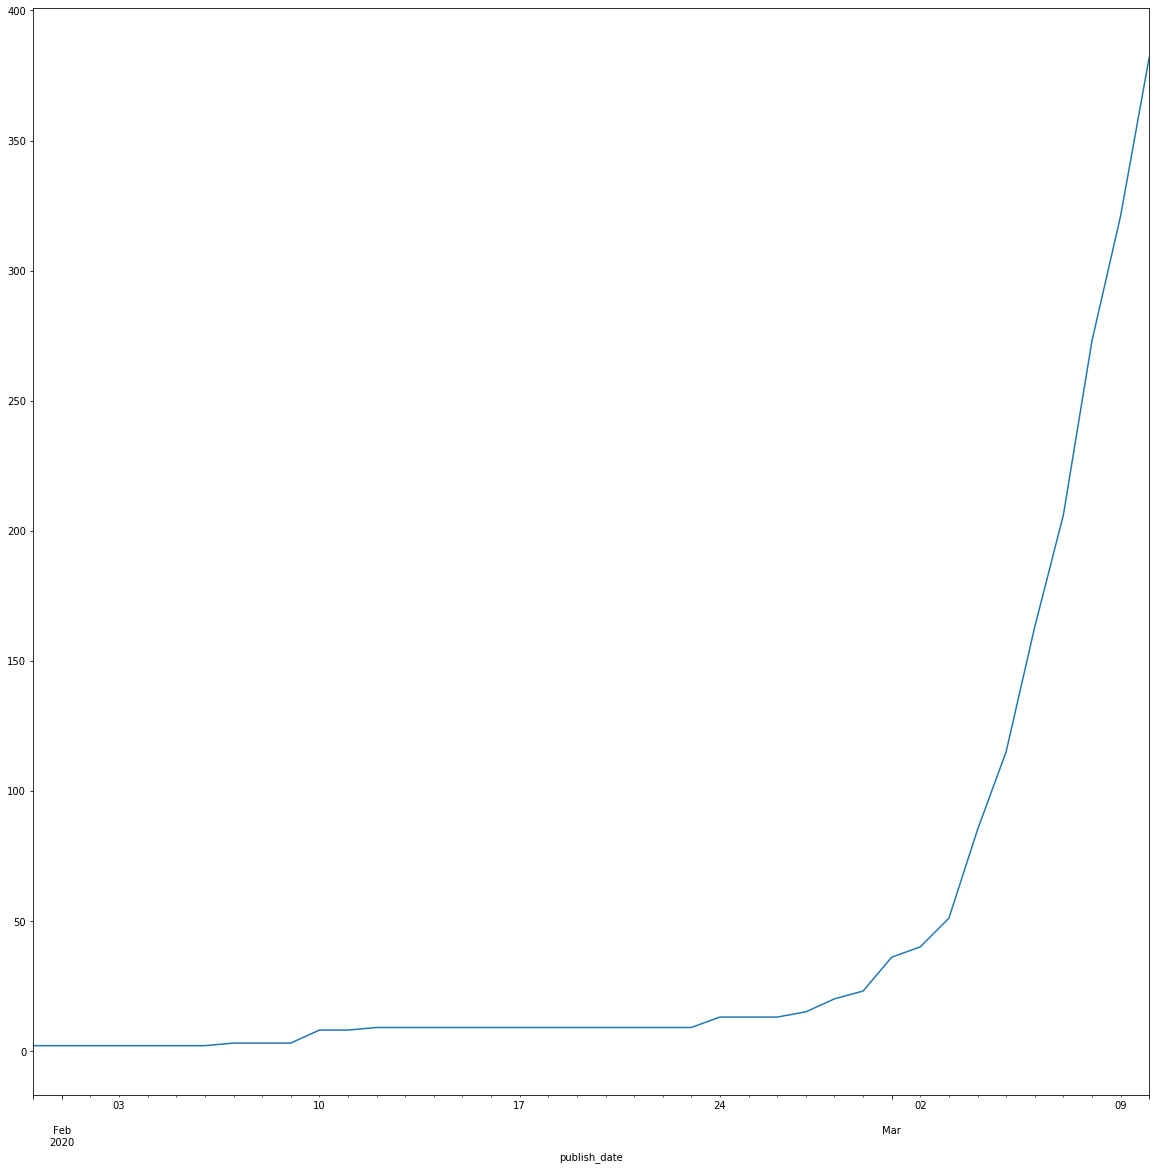

In [92]:
df[df["Country/Region"]=="UK"].Confirmed.plot(figsize=(20,20))

In [70]:
uk = df[df["Country/Region"]=="UK"]
china = df[df["Country/Region"]=="Mainland China"]
italy = df[df["Country/Region"]=="Italy"]

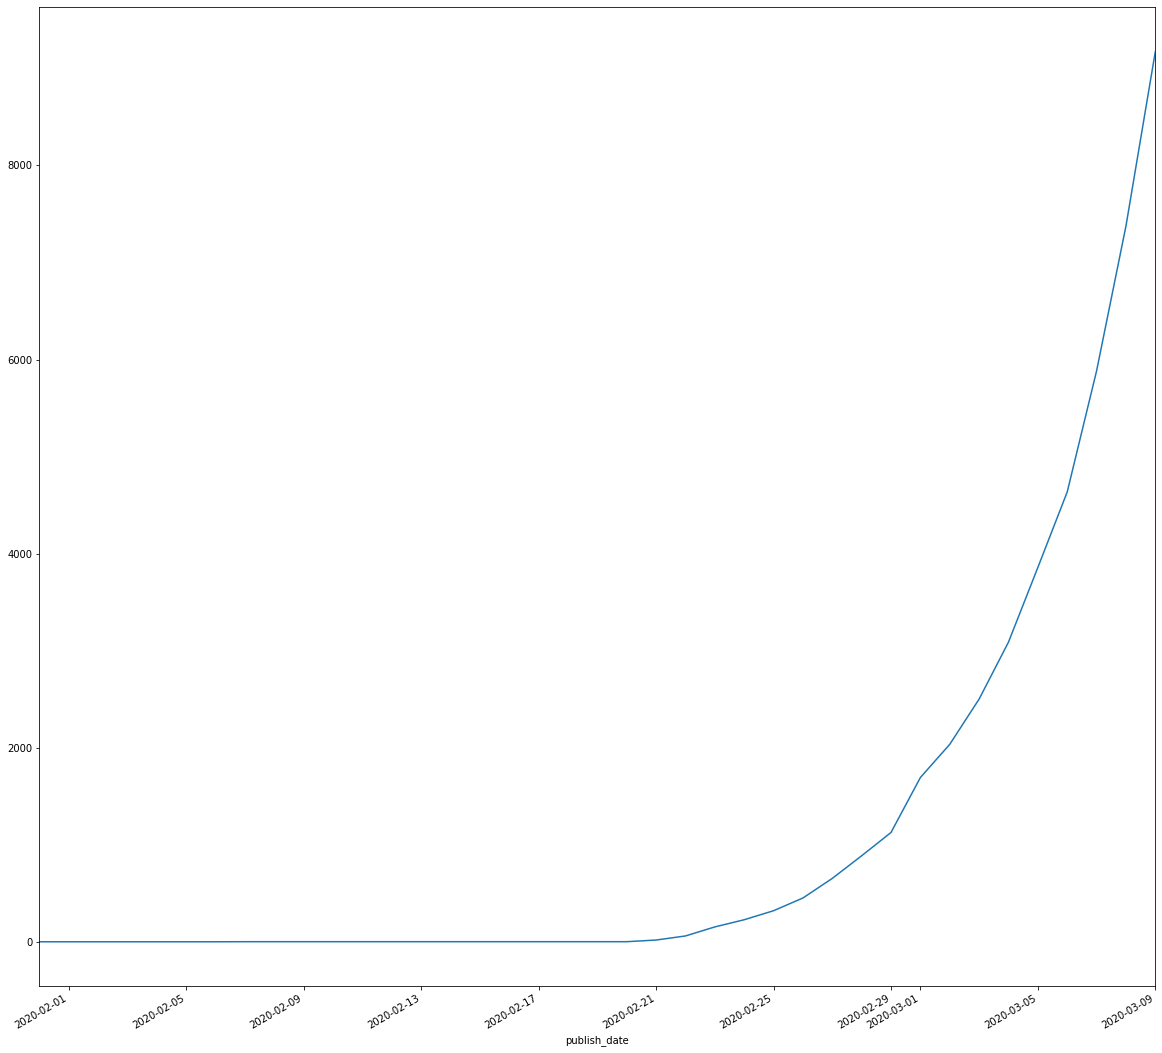

In [61]:
italy.Confirmed.plot(figsize=(20,20))

In [62]:
italy.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered,file_name
publish_date,,,,,,,,,
2020-02-26,453.0,Italy,12.0,2020-02-26T23:43:03,NaN,NaN,NaN,3.0,02-26-2020.csv
2020-02-27,655.0,Italy,17.0,2020-02-27T23:23:02,NaN,NaN,NaN,45.0,02-27-2020.csv
2020-02-18,3.0,Italy,0.0,2020-02-07T17:53:02,NaN,NaN,NaN,0.0,02-18-2020.csv
2020-02-19,3.0,Italy,0.0,2020-02-07T17:53:02,NaN,NaN,NaN,0.0,02-19-2020.csv
2020-02-12,3.0,Italy,0.0,2020-02-07T17:53:02,NaN,NaN,NaN,0.0,02-12-2020.csv


In [63]:
italy.shift(1).head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered,file_name
publish_date,,,,,,,,,
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,453.0,Italy,12.0,2020-02-26T23:43:03,NaN,NaN,NaN,3.0,02-26-2020.csv
2020-02-18,655.0,Italy,17.0,2020-02-27T23:23:02,NaN,NaN,NaN,45.0,02-27-2020.csv
2020-02-19,3.0,Italy,0.0,2020-02-07T17:53:02,NaN,NaN,NaN,0.0,02-18-2020.csv
2020-02-12,3.0,Italy,0.0,2020-02-07T17:53:02,NaN,NaN,NaN,0.0,02-19-2020.csv


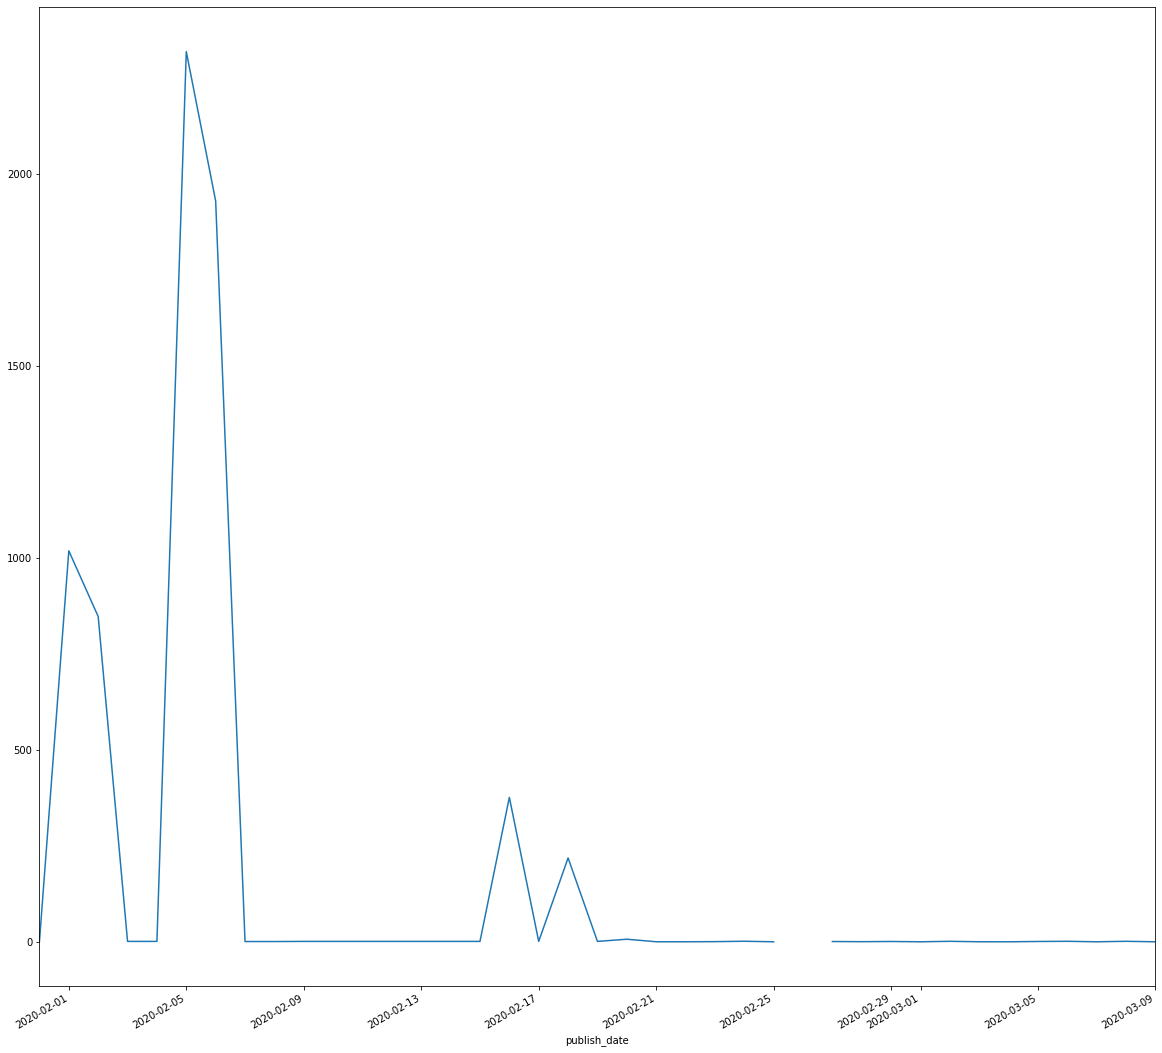

In [67]:
(italy.shift(1).Confirmed/italy.Confirmed).plot(figsize=(20,20))

In [93]:
uk

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered,file_name
publish_date,,,,,,,,,
2020-02-26,13.0,UK,0.0,2020-02-24T08:33:02,NaN,NaN,NaN,8.0,02-26-2020.csv
2020-02-27,15.0,UK,0.0,2020-02-27T13:23:02,NaN,NaN,NaN,8.0,02-27-2020.csv
2020-02-18,9.0,UK,0.0,2020-02-16T16:23:06,NaN,NaN,NaN,8.0,02-18-2020.csv
2020-02-19,9.0,UK,0.0,2020-02-16T16:23:06,NaN,NaN,NaN,8.0,02-19-2020.csv
2020-02-12,9.0,UK,0.0,2020-02-12T19:03:06,NaN,NaN,NaN,1.0,02-12-2020.csv
2020-02-13,9.0,UK,0.0,2020-02-12T19:03:06,NaN,NaN,NaN,1.0,02-13-2020.csv
2020-03-07,206.0,UK,2.0,2020-03-07T17:43:05,55.0,-3.0,NaN,18.0,03-07-2020.csv
2020-03-06,163.0,UK,2.0,2020-03-06T15:33:03,55.0,-3.0,NaN,8.0,03-06-2020.csv
2020-02-05,2.0,UK,0.0,2020-02-01T01:52:40,NaN,NaN,NaN,0.0,02-05-2020.csv
